In [1]:
import os
# 設置環境變數
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

[scikit-learn KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

# KMeans

# Step1:準備資料

In [3]:
iris=datasets.load_iris()

In [4]:
X=iris.data
X=X[:,2:4]

# Step2:建立模型

- n_clusters: k值
- init: `'random'`/ `'k-means++'` / 自行給定
- max_iter: 最多迭代次數
- tol: 中心點誤差忍受 (最好不要設0)
- random_state: 隨機種子

In [5]:
# 創建並訓練 KMeans 模型
KM = KMeans(n_clusters=3, init='random', n_init=10, random_state=5)
KM.fit(X)

KMeans(init='random', n_clusters=3, n_init=10, random_state=5)

# Step3: 進行分群

In [6]:
# 進行預測
y_kmeans = KM.predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Step4: 圖像化結果

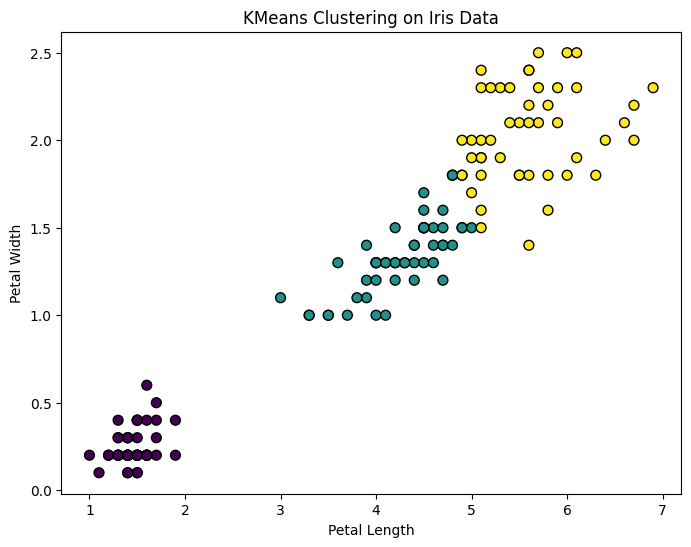

In [7]:
# 繪製預測結果
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.title("KMeans Clustering on Iris Data")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

# 與真實情況對照

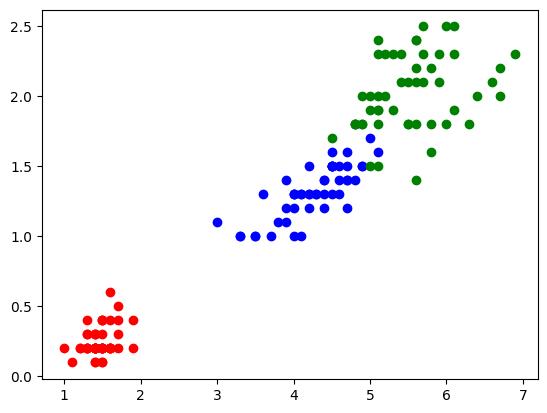

In [8]:
iris=datasets.load_iris()
features=iris.data
target=iris.target
target_names=iris.target_names
labels=target_names[target]

setosa_petal_length=features[labels=='setosa',2]
setosa_petal_width=features[labels=='setosa',3]
setosa=np.c_[setosa_petal_length,setosa_petal_width]

versicolor_petal_length=features[labels=='versicolor',2]
versicolor_petal_width=features[labels=='versicolor',3]
versicolor=np.c_[versicolor_petal_length,versicolor_petal_width]

virginica_petal_length=features[labels=='virginica',2]
virginica_petal_width=features[labels=='virginica',3]
virginica=np.c_[virginica_petal_length,virginica_petal_width]

# 繪製真實狀況
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')

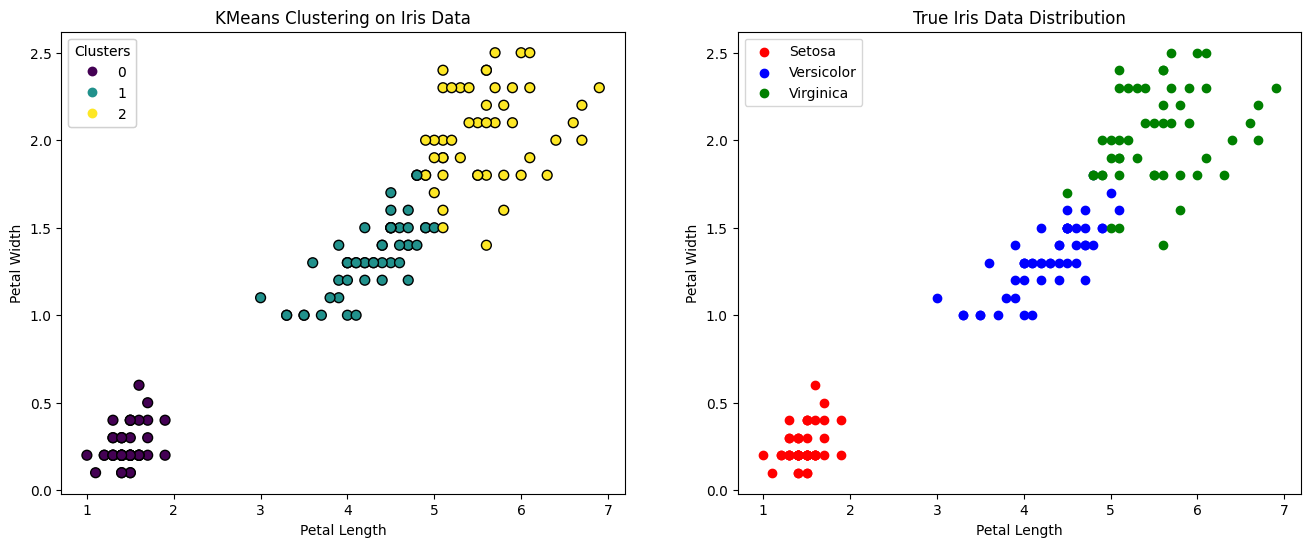

In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# 加載 Iris 數據集
iris = datasets.load_iris()
X = iris.data
X = X[:, 2:4]

# 創建並訓練 KMeans 模型
KM = KMeans(n_clusters=3, init='random', n_init=10, random_state=5)
KM.fit(X)

# 進行預測
y_kmeans = KM.predict(X)

# 獲取真實的分類標籤
y_true = iris.target

# 提取三種花的數據
setosa = X[y_true == 0]
versicolor = X[y_true == 1]
virginica = X[y_true == 2]

# 繪製圖表
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# 繪製預測結果
scatter = axs[0].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
legend1 = axs[0].legend(*scatter.legend_elements(), title="Clusters")
axs[0].add_artist(legend1)
axs[0].set_title("KMeans Clustering on Iris Data")
axs[0].set_xlabel("Petal Length")
axs[0].set_ylabel("Petal Width")

# 繪製真實狀況
axs[1].scatter(setosa[:, 0], setosa[:, 1], color='red', label='Setosa')
axs[1].scatter(versicolor[:, 0], versicolor[:, 1], color='blue', label='Versicolor')
axs[1].scatter(virginica[:, 0], virginica[:, 1], color='green', label='Virginica')
axs[1].set_title("True Iris Data Distribution")
axs[1].set_xlabel("Petal Length")
axs[1].set_ylabel("Petal Width")
axs[1].legend()

plt.show()

# K-Medoids

中心點為實際樣本點，且新中心點的決定方式為選取使群內距離和最小的點
> pip install scikit-learn-extra

In [10]:
from sklearn_extra.cluster import KMedoids

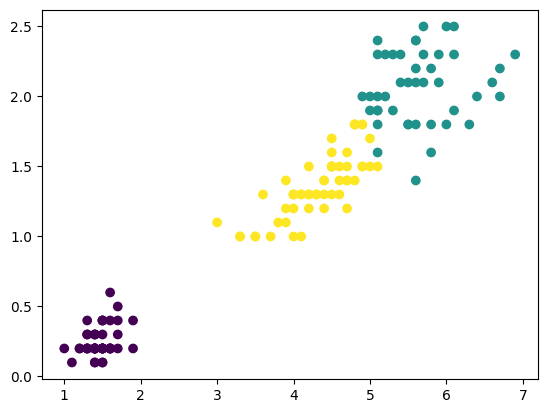

In [11]:
iris=datasets.load_iris()
X=iris.data
X=X[:,2:4]

KMed = KMedoids(n_clusters=3,init='random',random_state=5)
KMed.fit(X)
KMed.predict(X)
plt.scatter(X[:,0],X[:,1],c = KMed.predict(X))

# Clustering Model 評估指標

Clustering Model 評估指標:
1. Silhouette Coefficient (輪廓係數): 接近1，表示資料點非常接近其簇中心，且遠離最近的其他簇，聚類效果很好。
2. Calinski-Harabasz Index (CH指數): 值越大，表示簇內資料點緊密、簇間分離明顯，聚類效果越好。
3. Adjusted Rand Index (ARI): 接近1，表示聚類結果與真實標籤高度一致。
4. Normalized Mutual Information (NMI): 接近1，表示聚類結果與真實標籤高度相關。

In [12]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score, calinski_harabasz_score

true_labels = iris.target
predicted_labels = KMed.predict(X)

# 計算評估指標
silhouette_avg = silhouette_score(X, predicted_labels)
calinski_harabasz_avg = calinski_harabasz_score(X, predicted_labels)
ari = adjusted_rand_score(true_labels, predicted_labels)
nmi = normalized_mutual_info_score(true_labels, predicted_labels)

print(f'Silhouette Coefficient: {silhouette_avg:.4f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg:.4f}')
print(f'Adjusted Rand Index (ARI): {ari:.4f}')
print(f'Normalized Mutual Information (NMI): {nmi:.4f}')

Silhouette Coefficient: 0.6614
Calinski-Harabasz Index: 1211.1980
Adjusted Rand Index (ARI): 0.8512
Normalized Mutual Information (NMI): 0.8449
